In [2]:
import numpy as np
import numba as nb
from numba.typed import List
import pandas as pd
import itertools
from operator import itemgetter
import gc

from scipy.stats import norm, lognorm, truncnorm
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, deque
from sys import getsizeof
from sedgen.initialization import SedGen
from sedgen import initialization as ini
from sedgen import general as gen
from sedgen import preprocessing


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
# Reload all packages (except those excluded by %aimport) every time 
# before executing the Python code typed.
%autoreload 2

In [4]:
minerals = ["Q", "P", "K", "B", "O", "A"]

modal_mineralogy = np.array([[0.16331256, 0.46387757, 0.12683457, 0.05758711, 0.01078412, 0.17760407],   # AZ
                             [0.27453254, 0.40124204, 0.24993859, 0.02509231, 0.00454988, 0.04464465],   # CA-EW
                             [0.30591989, 0.38159713, 0.26209888, 0.0188256 , 0.00799247, 0.02356603],   # CA-NS
                             [0.19781274, 0.41766034, 0.16121575, 0.06478527, 0.00894429, 0.14958161],   # GR
                             [0.25983144, 0.46392506, 0.15827298, 0.04370113, 0.00689158, 0.06737782],   # MT
                             [0.22419158, 0.48490082, 0.05641885, 0.11571367, 0.00000001, 0.11877509]])  # WA

csds_AZ_means = np.array([0.120, 0.174, 0.112, 0.155, 0.066, 0.079])
csds_AZ_stds = np.array([0.359, 0.356, 0.455, 0.399, 0.328, 0.452])

csds_CA_EW_means = np.array([0.247, 0.333, 0.292, 0.212, 0.090, 0.127])
csds_CA_EW_stds = np.array([0.986, 0.640, 0.497, 0.889, 0.275, 0.502])

csds_CA_NS_means = np.array([0.309, 0.330, 0.244, 0.223, 0.120, 0.122])
csds_CA_NS_stds = np.array([0.823, 0.683, 0.817, 0.819, 0.554, 0.782])

csds_GR_means = np.array([0.244, 0.269, 0.222, 0.251, 0.059, 0.107])
csds_GR_stds = np.array([0.312, 0.450, 0.444, 0.262, 0.378, 0.313])

csds_MT_means = np.array([0.220, 0.227, 0.160, 0.153, 0.078, 0.075])
csds_MT_stds = np.array([0.472, 0.415, 0.344, 0.363, 0.315, 0.599])

csds_WA_means = np.array([0.342, 0.385, 0.241, 0.481, 0.001, 0.130])
csds_WA_stds = np.array([0.542, 0.478, 0.386, 0.467, 0.001, 0.494])



In [9]:
par_rock = 1e9
data1 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 100, discretization_init = False, timed = True)
datapunt1 = np.sum(data1.simulated_volume)/par_rock
data2 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 1000, discretization_init = False, timed = True)
datapunt2 = np.sum(data2.simulated_volume)/par_rock
data3 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 10000, discretization_init = False, timed = True)
datapunt3 = np.sum(data3.simulated_volume)/par_rock
data4 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 100000, discretization_init = False, timed = True)
datapunt4 = np.sum(data4.simulated_volume)/par_rock

---SedGen model initialization started---

Initializing modal mineralogy...
Initializing csds...
Initializing bins...
Simulating mineral occurences... |Q|P|K|B|O|A| Done in 37.1253 seconds
Initializing interfaces... |Q|P|K|B|O|A| Done in 84.2002 seconds
Counting interfaces...  Done in 0.8572 seconds
Correcting interface arrays for consistency...
too much Q 3
too few P -1
all good K 0
too few B -1
too few O -1
all good A 0
Initializing crystal size array... |Q|P|K|B|O|A| Done in 6.5167 seconds
Initializing inter-crystal breakage probability arrays...
Initializing model evolution arrays...

---SedGen model initialization finished succesfully---
---SedGen model initialization started---

Initializing modal mineralogy...
Initializing csds...
Initializing bins...
Simulating mineral occurences... |Q|P|K|B|O|A| Done in 42.6691 seconds
Initializing interfaces... |Q|P|K|B|O|A| Done in 90.0715 seconds
Counting interfaces...  Done in 0.8333 seconds
Correcting interface arrays for consistency...
t

[2. 3. 4. 5.]


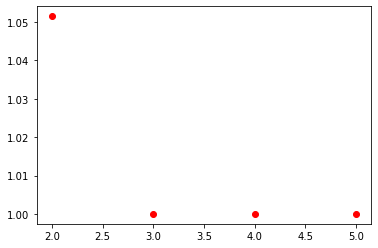

In [14]:
x = np.array([100,1000,10000,100000])

y = np.array([datapunt1, datapunt2, datapunt3, datapunt4])
logar = np.log10(x)
print(logar)

plt.plot(logar,y,'ro')

---SedGen model initialization started---

Initializing modal mineralogy...
Initializing csds...
Initializing bins...
Simulating mineral occurences... |Q|P|K|B|O|A| Done in 3.6230 seconds
Initializing interfaces... |Q|P|K|B|O|A| Done in 8.3115 seconds
Counting interfaces...  Done in 0.0846 seconds
Correcting interface arrays for consistency...
too much Q 1
too few P -1
too few K -1
all good B 0
all good O 0
too much A 1
Initializing crystal size array... |Q|P|K|B|O|A| Done in 0.5754 seconds
Initializing inter-crystal breakage probability arrays...
Initializing model evolution arrays...

---SedGen model initialization finished succesfully---
---SedGen model initialization started---

Initializing modal mineralogy...
Initializing csds...
Initializing bins...
Simulating mineral occurences... |Q|P|K|B|O|A| Done in 3.4214 seconds
Initializing interfaces... |Q|P|K|B|O|A| Done in 7.6837 seconds
Counting interfaces...  Done in 0.0831 seconds
Correcting interface arrays for consistency...
too m

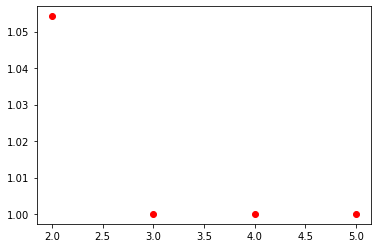

In [5]:
par_rock = 1e8
data1 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 100, discretization_init = False, timed = True)
datapunt1 = np.sum(data1.simulated_volume)/par_rock
data2 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 1000, discretization_init = False, timed = True)
datapunt2 = np.sum(data2.simulated_volume)/par_rock
data3 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 10000, discretization_init = False, timed = True)
datapunt3 = np.sum(data3.simulated_volume)/par_rock
data4 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 100000, discretization_init = False, timed = True)
datapunt4 = np.sum(data4.simulated_volume)/par_rock
x = np.array([100,1000,10000,100000])

y = np.array([datapunt1, datapunt2, datapunt3, datapunt4])
logar = np.log10(x)
print(logar)

plt.plot(logar,y,'ro')

---SedGen model initialization started---

Initializing modal mineralogy...
Initializing csds...
Initializing bins...
Simulating mineral occurences... |Q|P|K|B|O|A| Done in 0.6049 seconds
Initializing interfaces... |Q|P|K|B|O|A| Done in 0.7104 seconds
Counting interfaces...  Done in 0.0077 seconds
Correcting interface arrays for consistency...
too much Q 1
all good P 0
too few K -1
all good B 0
all good O 0
all good A 0
Initializing crystal size array... |Q|P|K|B|O|A| Done in 0.0485 seconds
Initializing inter-crystal breakage probability arrays...
Initializing model evolution arrays...

---SedGen model initialization finished succesfully---
---SedGen model initialization started---

Initializing modal mineralogy...
Initializing csds...
Initializing bins...
Simulating mineral occurences... |Q|P|K|B|O|A| Done in 0.7653 seconds
Initializing interfaces... |Q|P|K|B|O|A| Done in 0.6876 seconds
Counting interfaces...  Done in 0.0079 seconds
Correcting interface arrays for consistency...
all g

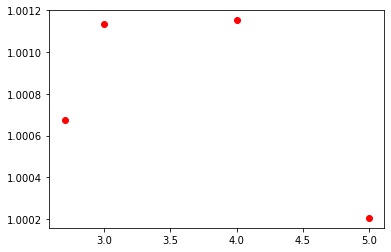

In [8]:
par_rock = 1e7
data1 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 500, discretization_init = False, timed = True)
datapunt1 = np.sum(data1.simulated_volume)/par_rock
data2 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 1000, discretization_init = False, timed = True)
datapunt2 = np.sum(data2.simulated_volume)/par_rock
data3 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 10000, discretization_init = False, timed = True)
datapunt3 = np.sum(data3.simulated_volume)/par_rock
data4 = SedGen(minerals, par_rock, modal_mineralogy[1], csds_AZ_means, csds_AZ_stds, learning_rate = 100000, discretization_init = False, timed = True)
datapunt4 = np.sum(data4.simulated_volume)/par_rock
x = np.array([500,1000,10000,100000])

y = np.array([datapunt1, datapunt2, datapunt3, datapunt4])
logar = np.log10(x)
print(logar)

plt.plot(logar,y,'ro')